<img src="apples.jpeg" style="width: 400px; height: 200px; float: right; margin: 10px; border: 2px solid #000; box-sizing: border-box;">

# Almák minőségi osztályozása
***
Az adatkészlet olyan jellemzőket tartalmaz, mint a méret, súly, édesség, ropogósság, lédússág, érettség, savasság és minőség.</br>
A modell a bemenő számszerűsített adatok alapján becsüli meg, hogy a végén az alma minősége milyen lesz (jó/rossz).</br></br>
Forrás: [kaggle.com](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
apples = pd.read_csv('datasets/apple_quality.csv')

In [81]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [82]:
apples.shape

(4001, 9)

In [83]:
# az acidity oszlop elsőre "object" típusú, ami később problémát jelent a ML algoritmusok során, ezt itt idejében kezeltem
apples['Acidity'] = pd.to_numeric(apples['Acidity'], errors='coerce')
apples.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [84]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [85]:
apples.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

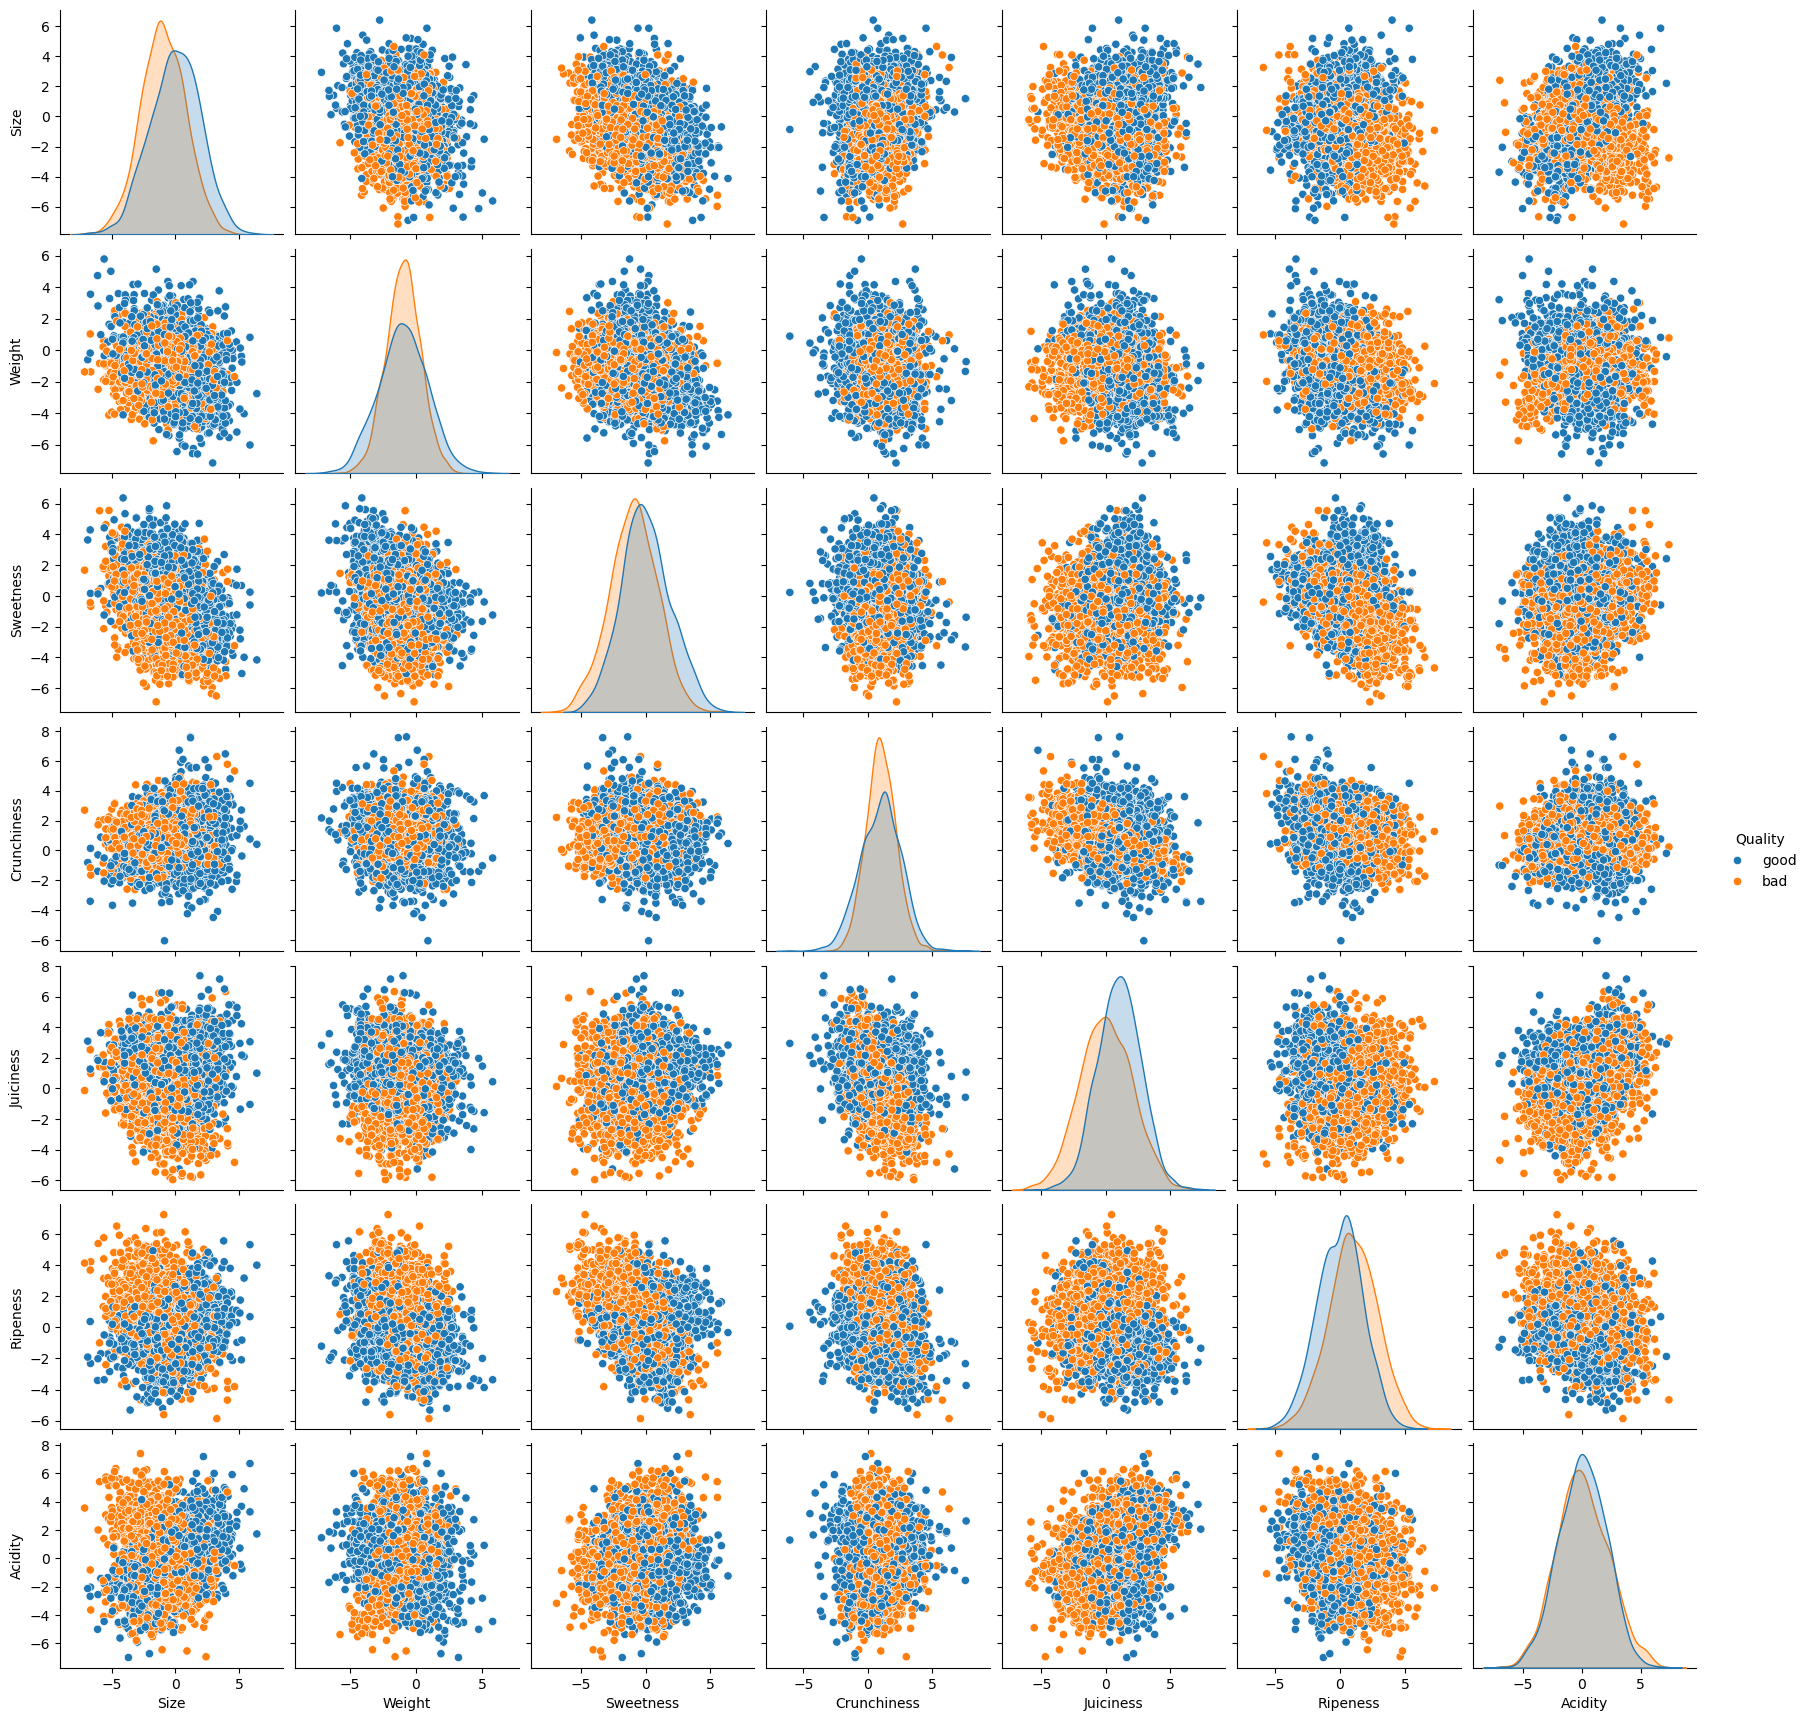

In [86]:
# bár az "A_id" oszlop típusú helytelenül float64, azt csak egyszerűen nem vettem bele az ábra rajzolásába, nem módosítottam, mint az "Acidity" oszlopot
g = sns.pairplot(apples.drop(columns='A_id'), hue='Quality')

<Axes: xlabel='Size', ylabel='Sweetness'>

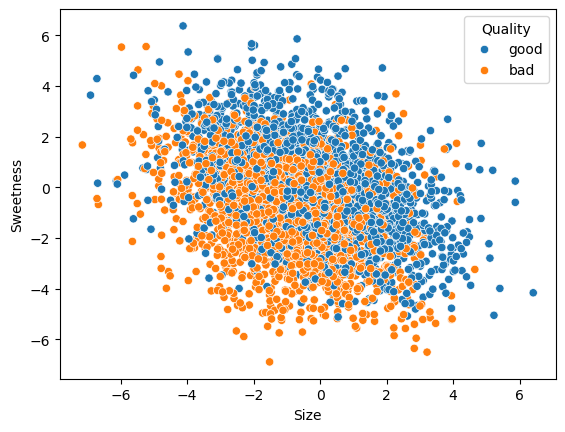

In [87]:
# kicsit pesszimista lettem az erősen összekeveredő narancs és kék területek miatt, a lenti tűnt a leginkább szétválaszthatónak
sns.scatterplot(x='Size', y='Sweetness', hue='Quality', data=apples)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [89]:
# az utolsó sort üresnek számolta a ML algoritmus, így azt töröltem, hogy ne fusson hibára
apples = apples.dropna()

In [90]:
apples

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [91]:
apple_feature = apples.drop('Quality', axis=1)
apple_target = apples['Quality']

In [92]:
apple_feature_train, apple_feature_test, apple_target_train, apple_target_test = train_test_split(
    apple_feature, apple_target, test_size=0.2, random_state=11111)

In [93]:
apple_feature_train

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
347,347.0,-1.107686,0.419847,-0.784380,0.489854,4.140066,2.333638,-1.815198
2278,2278.0,-1.346707,-2.293758,0.309239,1.535802,-0.278842,0.056952,4.324596
962,962.0,-1.719886,-1.664452,0.446356,1.557677,2.120095,0.657711,-0.977912
2534,2534.0,-0.485155,-3.655567,0.164346,0.965474,3.748740,-2.989809,0.508299
3027,3027.0,-1.987301,-0.512449,2.029871,-0.899804,1.134417,1.278730,-2.327120
...,...,...,...,...,...,...,...,...
2740,2740.0,-0.111685,0.489788,-0.333828,-1.265075,0.343857,1.031916,-4.865750
502,502.0,-3.317159,0.105307,3.542141,2.550257,-2.113224,-3.586288,5.305218
2111,2111.0,-0.694672,-1.573373,-2.501968,2.817213,-3.079667,2.544749,0.518192
3705,3705.0,0.722923,-2.815059,-2.233039,0.526597,1.855821,1.249779,-0.633685


In [94]:
# ellenőrzés, nincs-e NaN érték
apple_feature_train.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
dtype: int64

In [95]:
# a stringet nem tudja kezelni mint célobjektum, ezért át kell kódolni numpy array-be
label_encoder = LabelEncoder()
apple_target_train_encoded = label_encoder.fit_transform(apple_target_train)

In [96]:
# az elkészült numpy array így néz ki
apple_target_train_encoded

array([0, 0, 1, ..., 0, 0, 1])

In [97]:
# itt még jó ötletnek tűnik a Support Vector Machines módszer alkalmazása, létrehozzuk az objektum példányát
svc = SVC()

# az SVM osztályozó tanítása
svc.fit(apple_feature_train, apple_target_train_encoded)

# A tésztkészletből való becslés
apple_target_predicted = svc.predict(apple_feature_test)

# Visszakódolja az becsléseket, visszakapjuk az eredeti stringeket
apple_target_predicted_decoded = label_encoder.inverse_transform(apple_target_predicted)

# A pontosság számítása
accuracy = accuracy_score(apple_target_test, apple_target_predicted_decoded)
print("Accuracy:", accuracy)

Accuracy: 0.4675


Tehát a mindenféle számítás nélküli fifty-fifty eséllyel hamarabb találjuk el, jó-e az alma. :)</br>
Érdemes megnézni más módszerekkel is.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import time

methods = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('C-Support Vector Classification', SVC()),
]

method_names = []
method_accuracy = []
method_execution_time = []

for name, model in methods:
    start_time = time.time()
    
    kfold = StratifiedKFold(n_splits=10, random_state=11111, shuffle=True)
    cv_results = cross_val_score(model, apple_feature, apple_target, cv=kfold, scoring='accuracy')
    accuracy = 100*cv_results.mean()

    end_time = time.time()
    execution_time = end_time - start_time

    print(f'{name}: {accuracy:.2f}%\nExecution Time: {execution_time:.3f} s\n')
    method_names.append(name)
    method_accuracy.append(accuracy)
    method_execution_time.append(execution_time)
    

Logistic Regression: 74.77%
Execution Time: 0.134 s

Linear Discriminant Analysis: 74.70%
Execution Time: 0.179 s

K-Neighbors Classifier: 56.38%
Execution Time: 0.259 s

Decision Tree Classifier: 80.58%
Execution Time: 0.420 s

Gaussian Naive Bayes: 75.10%
Execution Time: 0.069 s

C-Support Vector Classification: 48.22%
Execution Time: 5.629 s



Text(0.5, 1.0, 'Method Accuracy')

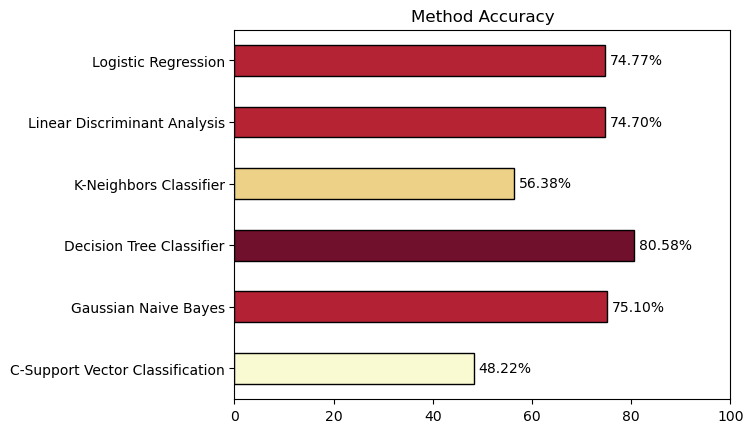

In [99]:
# Rajzolok még egy ábrát, ami látványosabban mutatja a módszerek pontosságát

ax = sns.barplot(
    y=method_names,
    x=method_accuracy,
    width=0.5,
    hue=method_accuracy,
    palette="YlOrRd",
    legend=False,
    edgecolor="black"
    )

# hogy 100-ig terjedjen az x-tengely
ax.set_xlim(0, 100)

# eredmények kiírása az oszlopok mellé
for i, v in enumerate(method_accuracy):
    ax.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=10, color='black')
    
ax.set_title("Method Accuracy")

Tehát érzésből sikerült a legrosszabb módszert kiválasztanom. :)</br>
Viszont a legjobban teljesítő DTC módszert külön is lefuttatom:

In [100]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(apple_feature_train, apple_target_train_encoded)

apple_target_predicted = dt_classifier.predict(apple_feature_test)

apple_target_predicted_decoded = label_encoder.inverse_transform(apple_target_predicted)

accuracy = accuracy_score(apple_target_test, apple_target_predicted_decoded)
print("Accuracy:", accuracy)

Accuracy: 0.81125


A confusion mátrixot is kiíratom még:

In [101]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(apple_target_test, apple_target_predicted_decoded)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[323  83]
 [ 68 326]]


Text(0.5, 1.0, 'Method Execution Time')

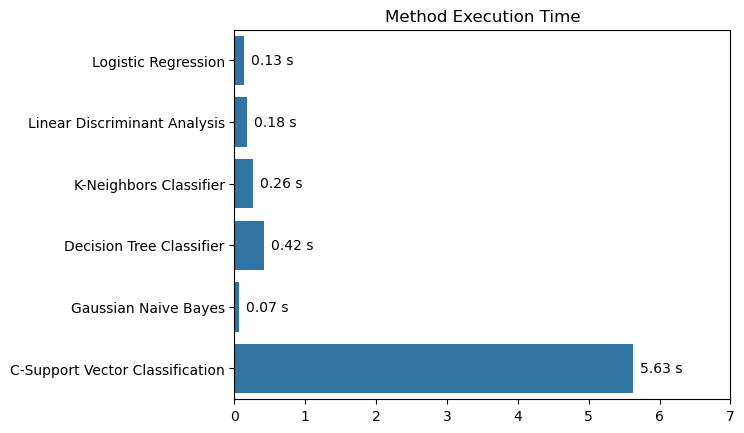

In [102]:
import math

ax2 = sns.barplot(
        y=method_names,
        x=method_execution_time
        )

ax2.set_xlim(0, math.ceil(max(method_execution_time) + 1))

for i, v in enumerate(method_execution_time):
    ax2.text(v + 0.1, i, f'{v:.2f} s', va='center', fontsize=10, color='black')
    
ax2.set_title("Method Execution Time")

Text(0, 0.5, 'Execution time [s]')

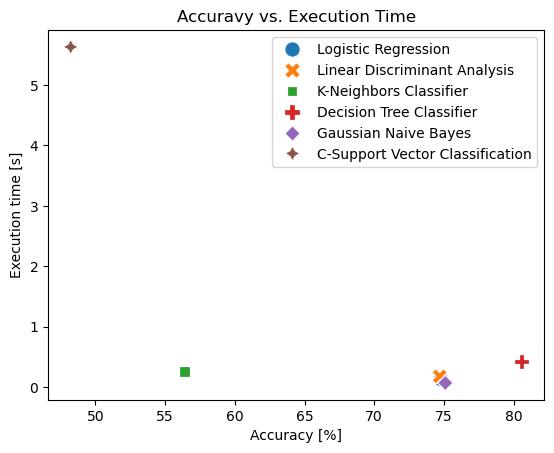

In [104]:
ax3 = sns.scatterplot(
    x=method_accuracy,
    y=method_execution_time,
    hue=method_names,
    style=method_names,
    s=125
    )

ax3.set_title("Accuravy vs. Execution Time")
ax3.set_xlabel("Accuracy [%]")
ax3.set_ylabel("Execution time [s]")